**Predicting energy consumption is an essential part of the electricity company supply. This project will explores energy consumption prediction models using data mining approach for the steel industry.** 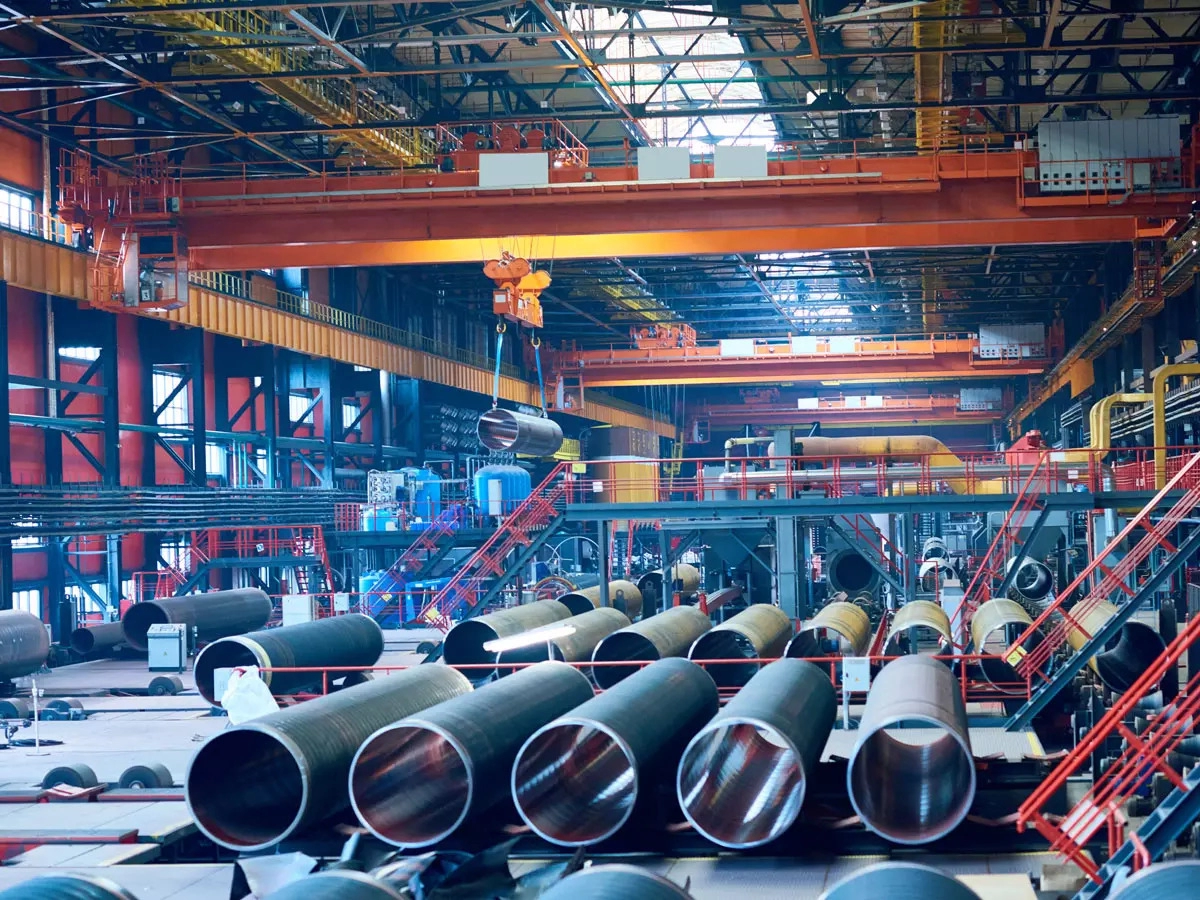

**Data Set Information:**

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

# Attribute Information:
Data Variables Type Measurement

Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

tCO2(CO2) Continuous ppm

Lagging Current power factor Continuous %

Leading Current Power factor Continuous %

Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday â€¦. Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load


# Problem defination 1:
**Regression model to predict energy consumption:**
 This approach involves building a regression model that takes the Lagging Current reactive power, Leading Current reactive power, tCO2 (CO2), Lagging Current power factor, Leading Current Power factor, Number of Seconds from midnight, Week status, Day of week, and Load Type as input variables and predicts the energy consumption in kWh as the target variable.

import library

In [ ]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

# EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Project/Steel_industry_data.csv')
df1=pd.read_csv('/content/drive/MyDrive/Machine Learning/Project/Steel_industry_data.csv')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/Project/Steel_industry_data.csv')

In [ ]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [ ]:
df.shape

(35040, 11)

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


we can see that the Usage_kWh variable has a mean value of 27.39 and a standard deviation of 33.44, suggesting that there is a wide range of energy usage values in the dataset. We can also see that the Leading_Current_Power_Factor variable has a maximum value of 100, indicating that some readings may have perfect power factor. These insights can be useful in guiding data cleaning, normalization, and visualization efforts.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [ ]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

# NO null values present

In [ ]:
#correlation of each variable
corr=df.corr()
corr

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


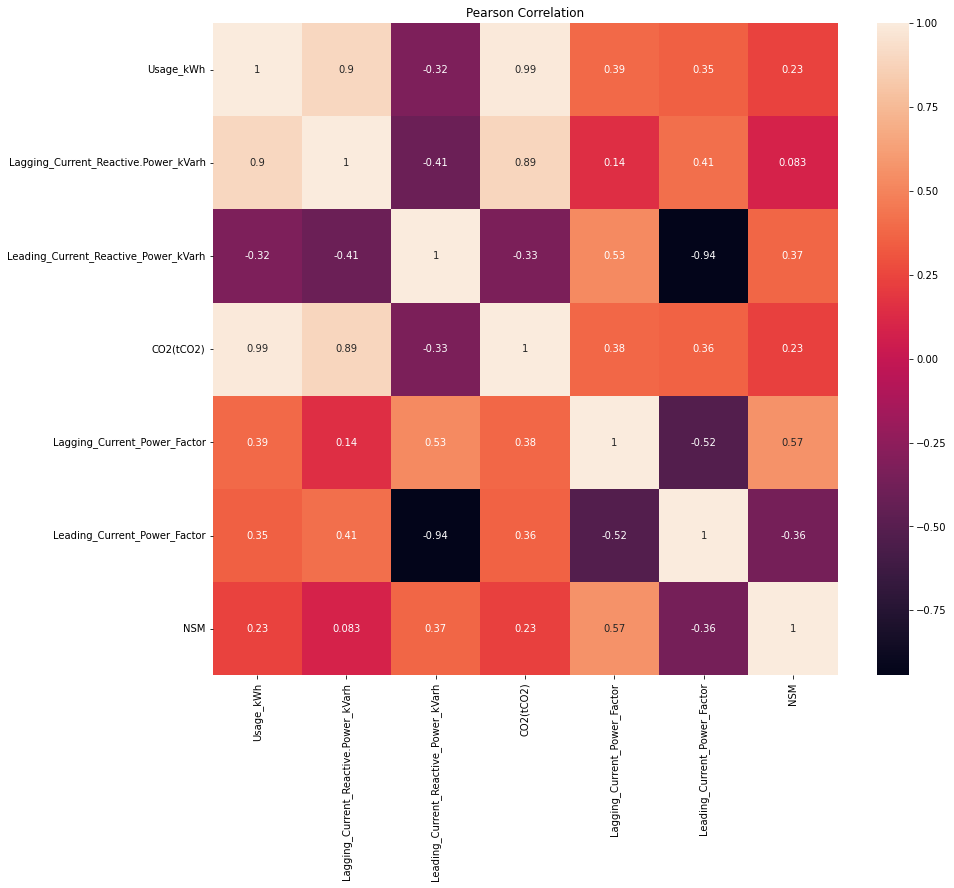

In [ ]:
#visualize the correlation using pearson correlation
plt.figure(figsize = (14,12))
sns.heatmap(corr, annot = True)
plt.title("Pearson Correlation",loc = 'center')
plt.show()

Usage_kWh has a strong positive correlation with CO2(tCO2) (0.988180) and Lagging_Current_Reactive.Power_kVarh (0.896150).

Lagging_Current_Reactive.Power_kVarh has a negative correlation with Leading_Current_Reactive_Power_kVarh (-0.405142).

Leading_Current_Reactive_Power_kVarh has a strong negative correlation with Leading_Current_Power_Factor (-0.944039).

These insights from the correlation matrix can be used to guide feature selection and modeling decisions. For example, we can choose to include Usage_kWh, CO2(tCO2), Lagging_Current_Reactive.Power_kVarh, and Leading_Current_Reactive_Power_kVarh as input features in our model due to their high correlation with each other and potential predictive power.

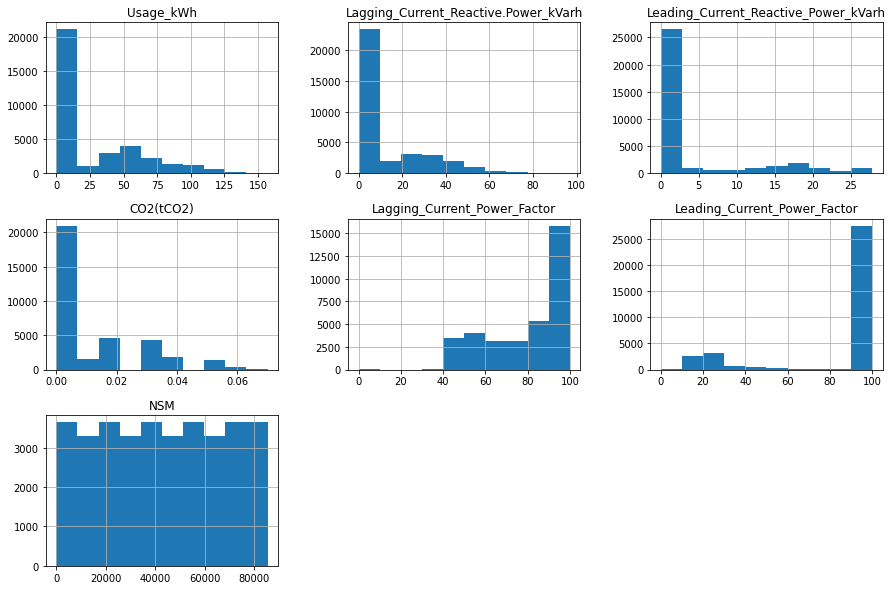

In [ ]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

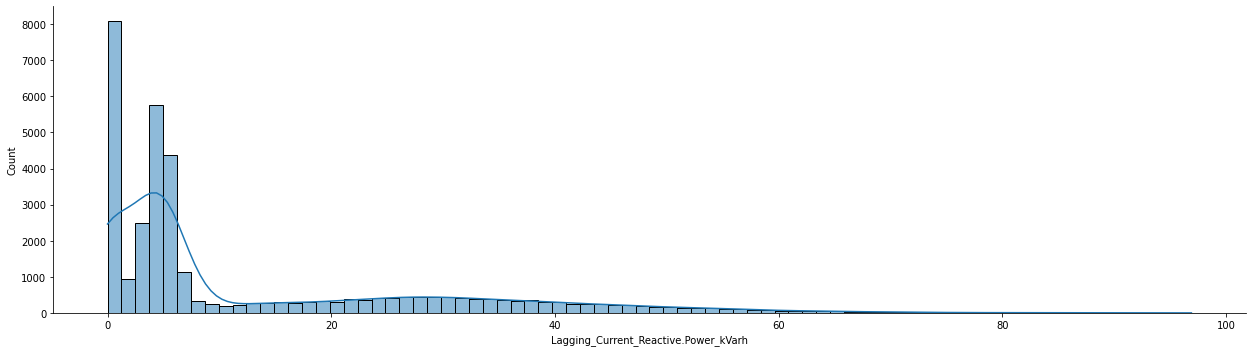

In [ ]:
sns.displot(data=df, x="Lagging_Current_Reactive.Power_kVarh", kde=True,height = 5, aspect = 3.5)

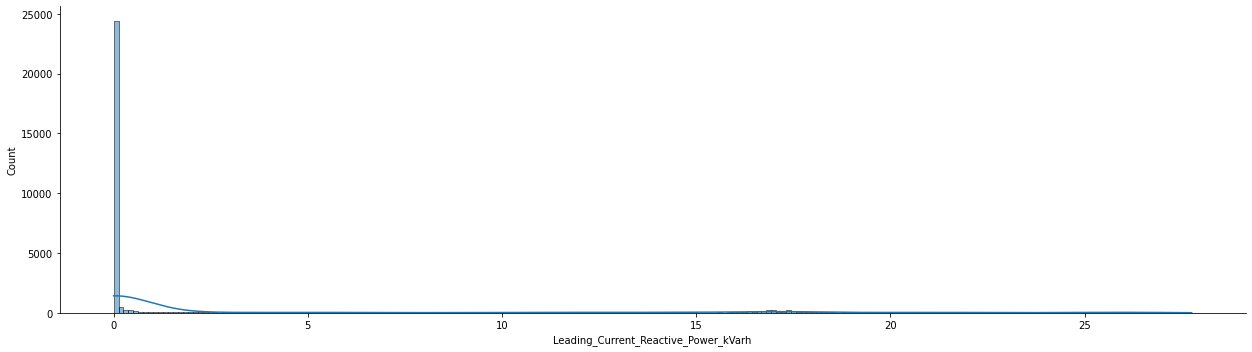

In [ ]:
sns.displot(data=df, x="Leading_Current_Reactive_Power_kVarh", kde=True,height = 5, aspect = 3.5)

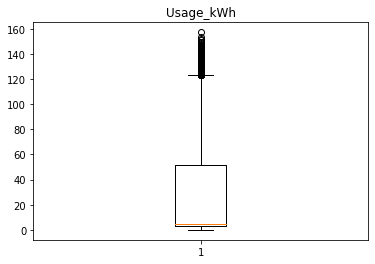

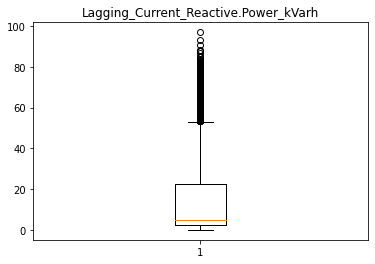

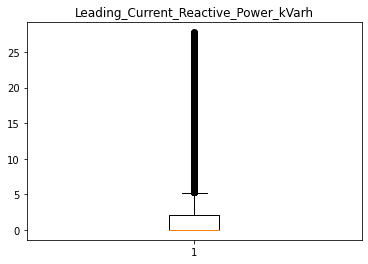

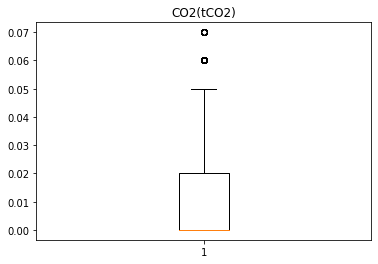

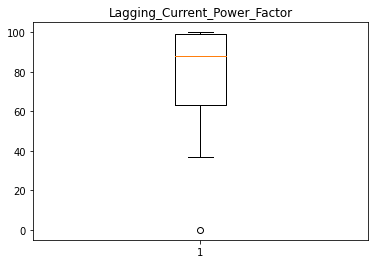

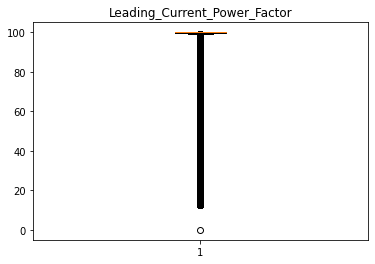

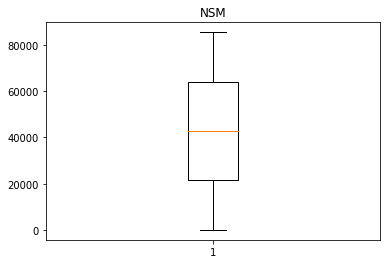

In [ ]:
# list of continuous column names
continuous_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# loop through each column and plot its boxplot
for col in continuous_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
    

#box plot insights
we can see 
'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh'  
have lot of outliers

# SCATTER PLOTS TO CHECK THE LINEAR REALATIONSHIP BETWEEN THESE VARIABLES

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
#Rename some columns
data = data.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
data.head()

,date,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


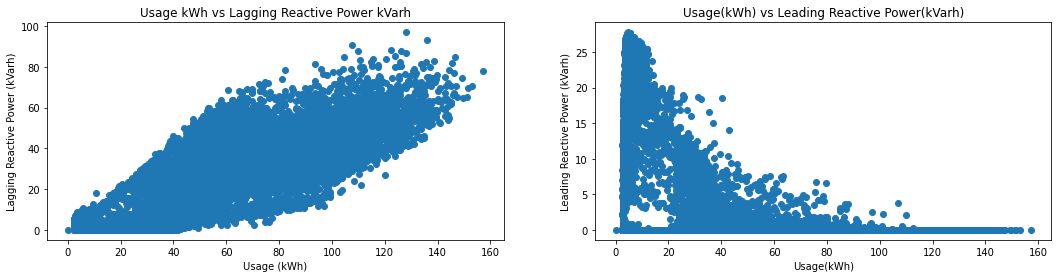

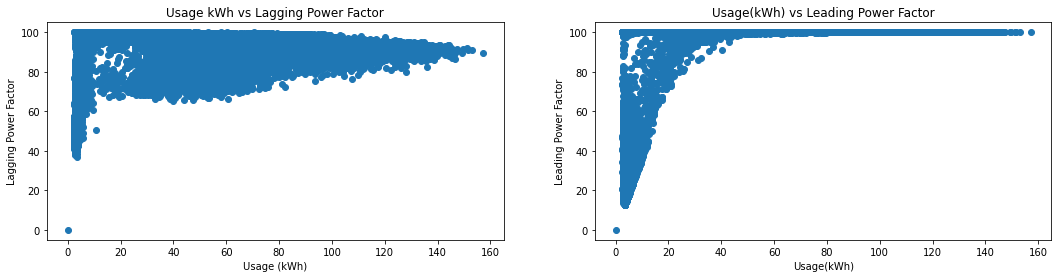

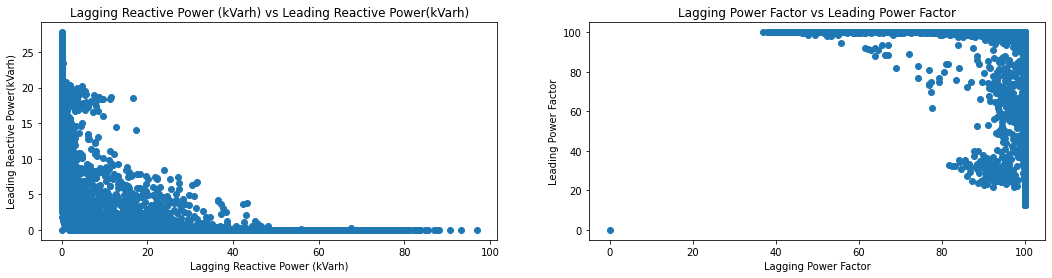

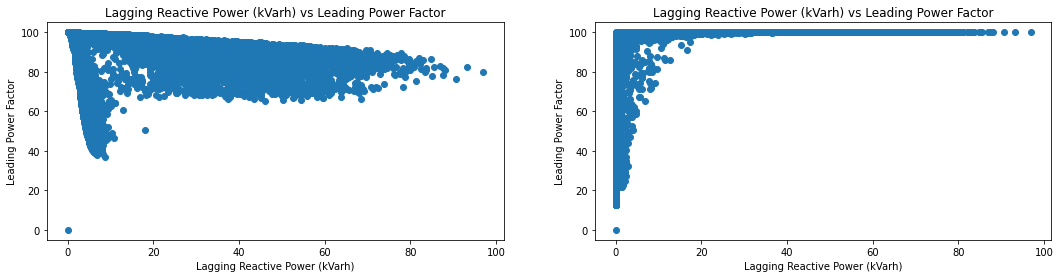

In [ ]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(18,4))
fig, (ax3,ax4) =plt.subplots(1,2, figsize=(18,4))
fig, (ax5,ax6) =plt.subplots(1,2, figsize=(18,4))
fig, (ax7,ax8) =plt.subplots(1,2, figsize=(18,4))

ax1.scatter(data=data,x="Usage_kWh", y="Lagging_Reactive_Power_kVarh")
ax1.set_title("Usage kWh vs Lagging Reactive Power kVarh")
ax1.set_xlabel("Usage (kWh)")
ax1.set_ylabel("Lagging Reactive Power (kVarh)")

ax2.scatter(data=data,x="Usage_kWh",y="Leading_Reactive_Power_kVarh")
ax2.set_title("Usage(kWh) vs Leading Reactive Power(kVarh)")
ax2.set_xlabel("Usage(kWh)")
ax2.set_ylabel("Leading Reactive Power (kVarh)")

ax3.scatter(data=data,x="Usage_kWh", y="Lagging_Power_Factor")
ax3.set_title("Usage kWh vs Lagging Power Factor")
ax3.set_xlabel("Usage (kWh)")
ax3.set_ylabel("Lagging Power Factor")

ax4.scatter(data=data,x="Usage_kWh",y="Leading_Power_Factor") 
ax4.set_title("Usage(kWh) vs Leading Power Factor")
ax4.set_xlabel("Usage(kWh)")
ax4.set_ylabel("Leading Power Factor")

ax5.scatter(data=data,x="Lagging_Reactive_Power_kVarh",y="Leading_Reactive_Power_kVarh") 
ax5.set_title("Lagging Reactive Power (kVarh) vs Leading Reactive Power(kVarh)")
ax5.set_xlabel("Lagging Reactive Power (kVarh)")
ax5.set_ylabel("Leading Reactive Power(kVarh)")

ax6.scatter(data=data,x="Lagging_Power_Factor",y="Leading_Power_Factor") 
ax6.set_title("Lagging Power Factor vs Leading Power Factor")
ax6.set_xlabel("Lagging Power Factor")
ax6.set_ylabel("Leading Power Factor")

ax7.scatter(data=data,x="Lagging_Reactive_Power_kVarh",y="Lagging_Power_Factor") 
ax7.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor")
ax7.set_xlabel("Lagging Reactive Power (kVarh)")
ax7.set_ylabel("Leading Power Factor")

ax8.scatter(data=data,x="Lagging_Reactive_Power_kVarh",y="Leading_Power_Factor") 
ax8.set_title("Lagging Reactive Power (kVarh) vs Leading Power Factor")
ax8.set_xlabel("Lagging Reactive Power (kVarh)")
ax8.set_ylabel("Leading Power Factor")

plt.show()

# We can see linear relationship between several variables here

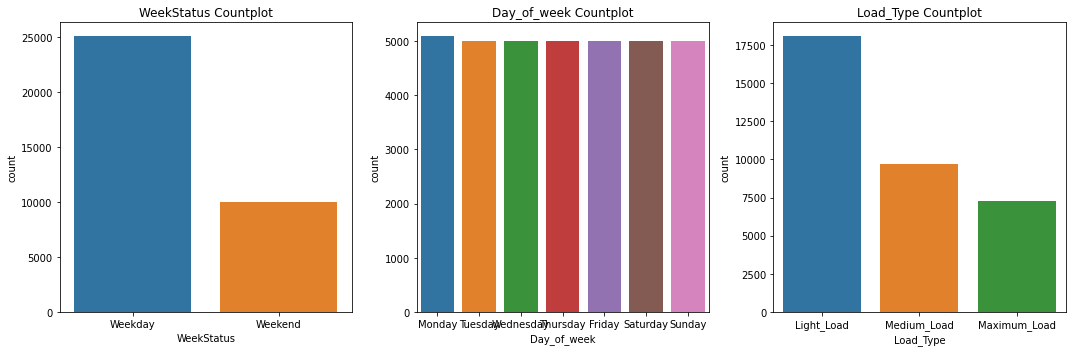

In [ ]:
# Select categorical features
cat_cols = ['WeekStatus', 'Day_of_week', 'Load_Type']
# Set figure size
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 5))
# Loop through categorical features and plot countplot
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} Countplot")
plt.tight_layout()
plt.show()

# IT shows weekdays have more consumption than that of weekends 
# Also shows there is light load most of the days

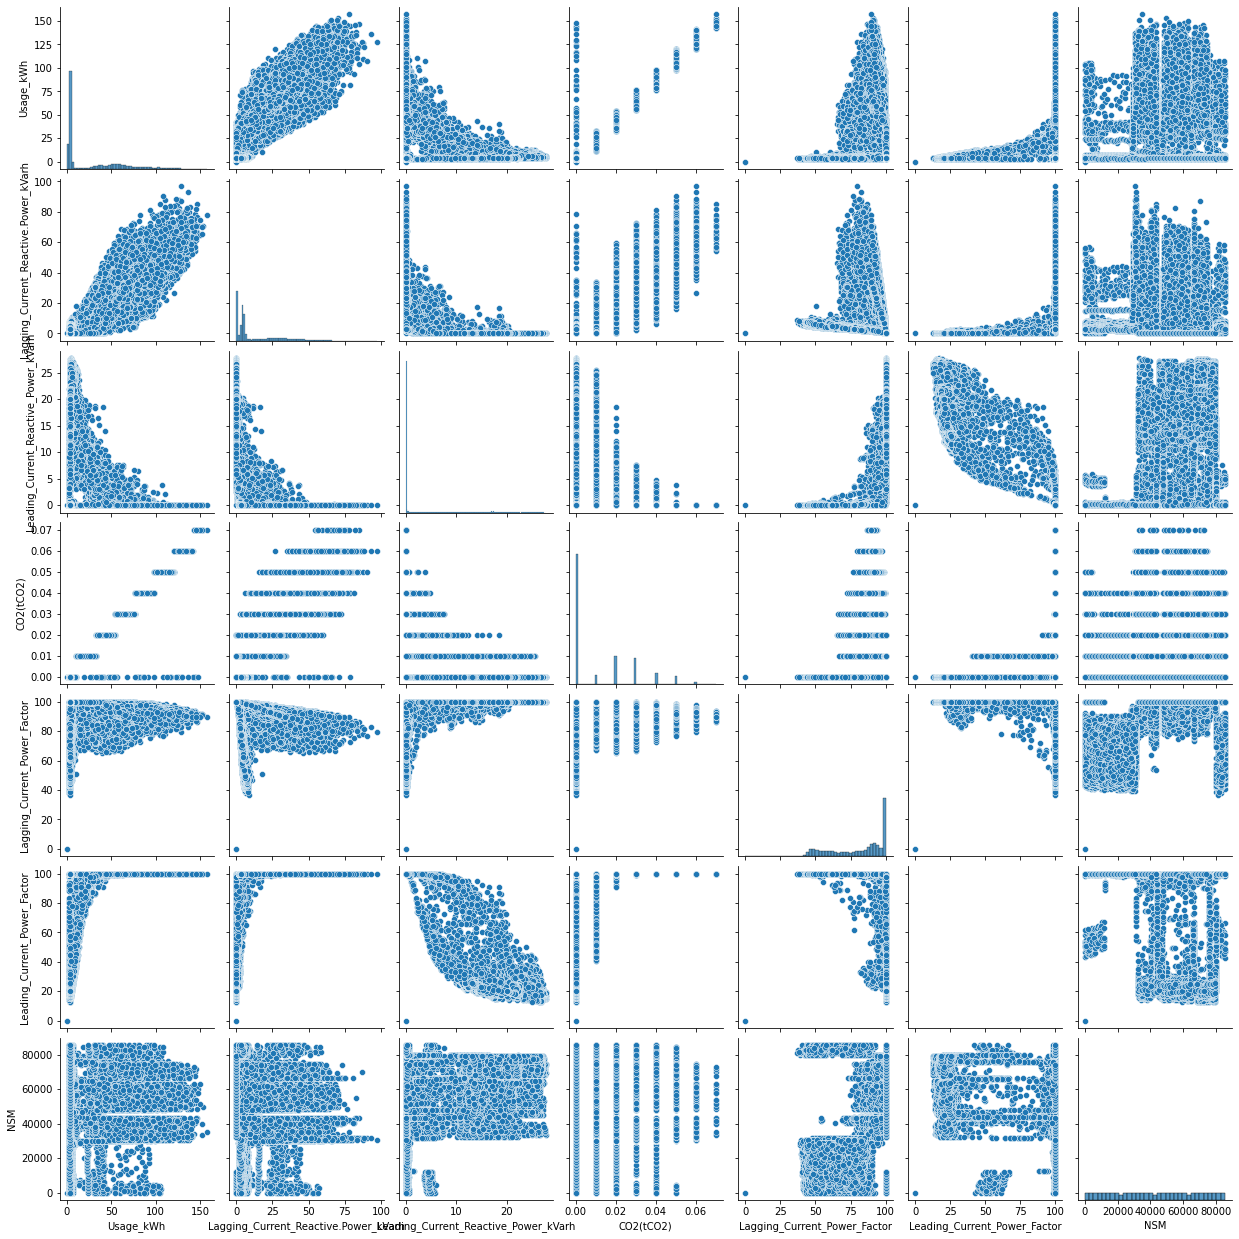

In [ ]:
sns.pairplot(df)

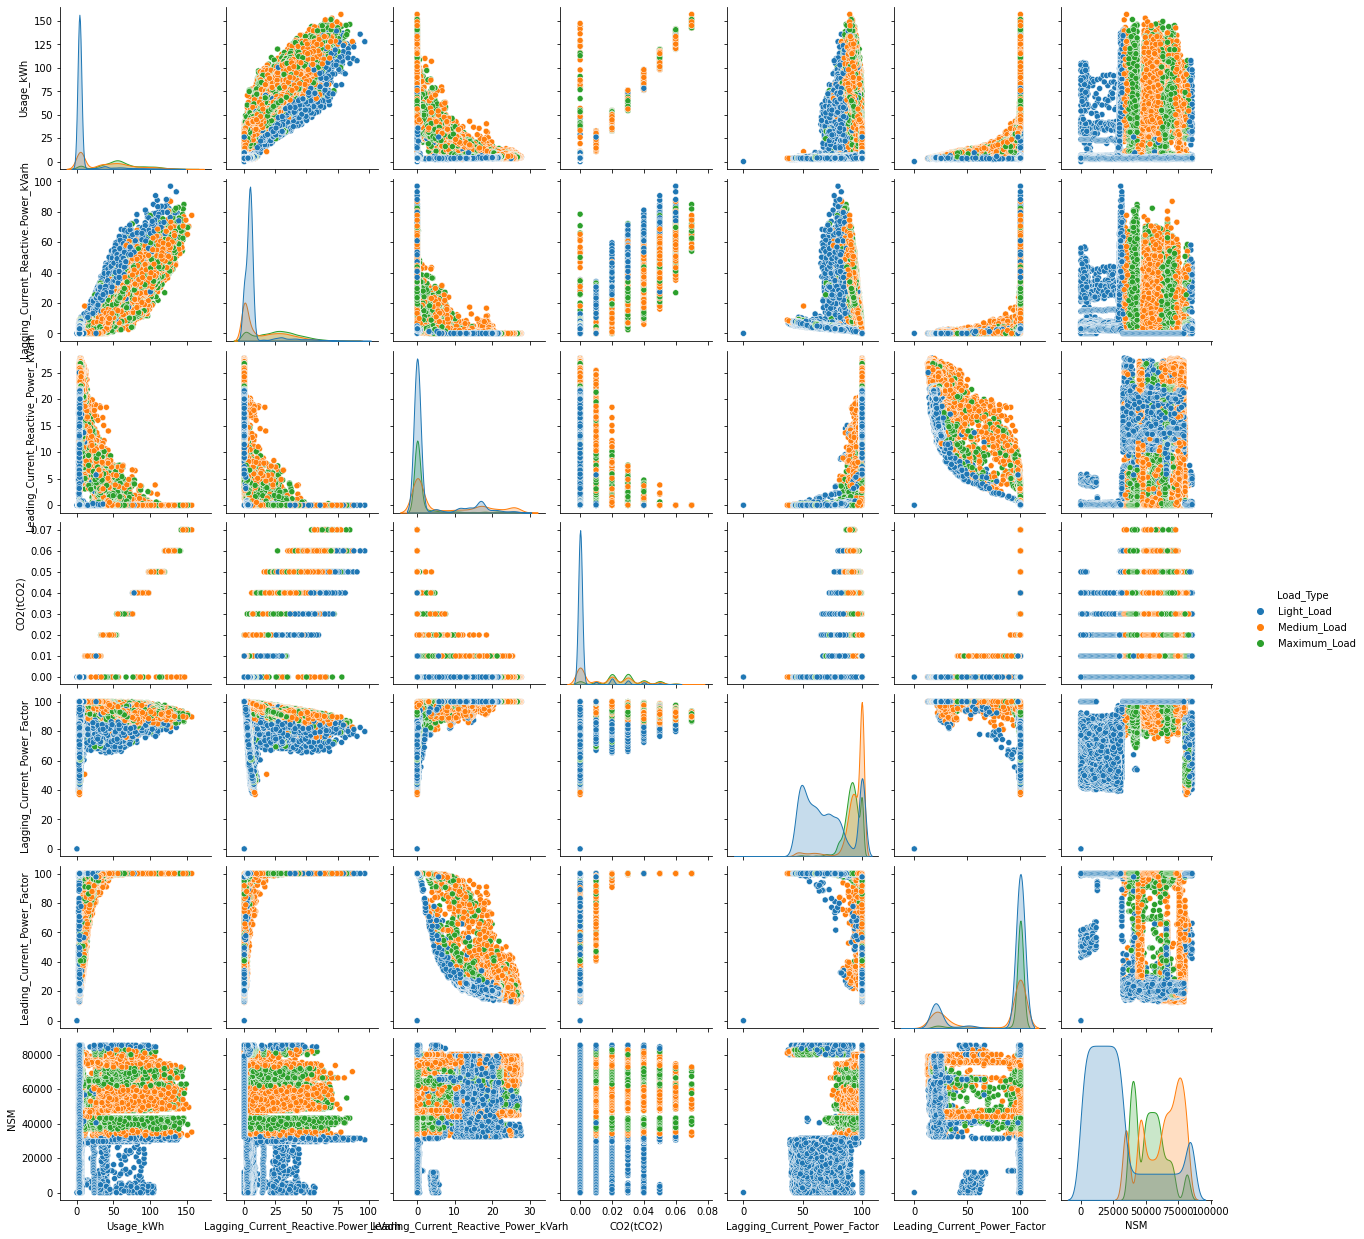

In [ ]:
sns.pairplot(df,hue='Load_Type')

# PRE processing

In [ ]:
df.head(2)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load


In [ ]:
#indexing date
df = df.set_index('date')
#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.intercept_#b0

-12.381191144575688

In [ ]:
reg.coef_#bi

array([ 3.41114139e-01,  6.97638499e-02,  1.62733422e+03,  1.26705400e-01,
        6.25879487e-02, -3.15800419e-06,  1.46697516e-01,  7.51458321e-03,
       -7.73015246e-02,  2.23999041e-01, -6.00961947e-02,  7.34452254e-01,
        8.58599143e-02,  1.33554741e+00,  1.90251890e+00])

In [ ]:
y_pred=reg.predict(X_test)
print("y_test:",y_test)
print("y_pred:",y_pred)

y_test: date
29/04/2018 07:15      2.88
04/10/2018 12:00     60.77
26/01/2018 11:30    120.42
02/06/2018 14:30      3.13
07/12/2018 15:00     58.86
                     ...  
27/04/2018 03:30      3.06
01/05/2018 09:45      3.17
16/10/2018 06:30      3.06
06/08/2018 06:30      2.59
05/02/2018 01:45      4.39
Name: Usage_kWh, Length: 10512, dtype: float64
y_pred: [  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]


In [ ]:
# mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

17.769389051354363

In [ ]:
# Root mean square error
from sklearn.metrics import mean_squared_error
root_mse=mean_squared_error(y_test,y_pred,squared=False)
print(root_mse)


4.215375315598169


In [ ]:
#R SQUARED(COEFFICIENT OF DETERMINATION)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9841681626773734

# Applying RF regressor 

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate random forest regressor with default hyperparameters
rf = RandomForestRegressor()
# Fit the model on training data
rf.fit(X_train, y_train)
# Predict on test data
y_pred = rf.predict(X_test)
print(y_pred)
# Compute RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2score=r2_score(y_test,y_pred)
# Compute 5-fold cross-validation scores for RMSE
cv_rmse_scores = np.sqrt(-cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error'))
# Print results
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("Cross-Validation RMSE Scores: ", cv_rmse_scores)
print("r2 score: ", r2score)

[  2.8823  60.7373 121.5594 ...   3.0571   2.5841   4.3801]
RMSE:  1.09321046756324
MAE:  0.3517089516742761
MAPE:  1.1499981625250675
Cross-Validation RMSE Scores:  [6.75401348 0.99986866 0.76077752 0.97327412 0.82939769]
r2 score:  0.9989352040626097


**# we can say the random forest REG is best fit best on these scores and error**
The RMSE (Root Mean Squared Error) is 1.09, which means that the average difference between the predicted and actual values is 1.09 kWh. The MAE (Mean Absolute Error) is 0.36, which means that the average absolute difference between the predicted and actual values is 0.36 kWh. The MAPE (Mean Absolute Percentage Error) is 1.17%, which means that the average absolute percentage difference between the predicted and actual values is 1.17%.


The Cross-Validation RMSE Scores show the RMSE for each fold in the cross-validation process. The scores range from 0.75 to 6.77, with a mean score of 2.26. This indicates that the model is performing well on average, but there is some variation in performance across different folds.


The r2 score is 0.9989, which is very close to 1.0. This indicates that the model is explaining a large amount of the variance in the data and is a good fit for the data.

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
regr2 = sm.OLS(y,X)
model = regr2.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Usage_kWh   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.066e+05
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        02:55:53   Log-Likelihood:                     -1.0416e+05
No. Observations:               35040   AIC:                                  2.083e+05
Df Residuals:                   35026   BIC:                                  2.085e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

## Problem defination 2:
**Classification model to predict load type:**

 This approach involves building a classification model that takes the Lagging Current reactive power, Leading Current reactive power, tCO2 (CO2), Lagging Current power factor, Leading Current Power factor, Number of Seconds from midnight, Week status, and Day of week as input variables and predicts the Load Type (Light Load, Medium Load, Maximum Load) as the target variable.

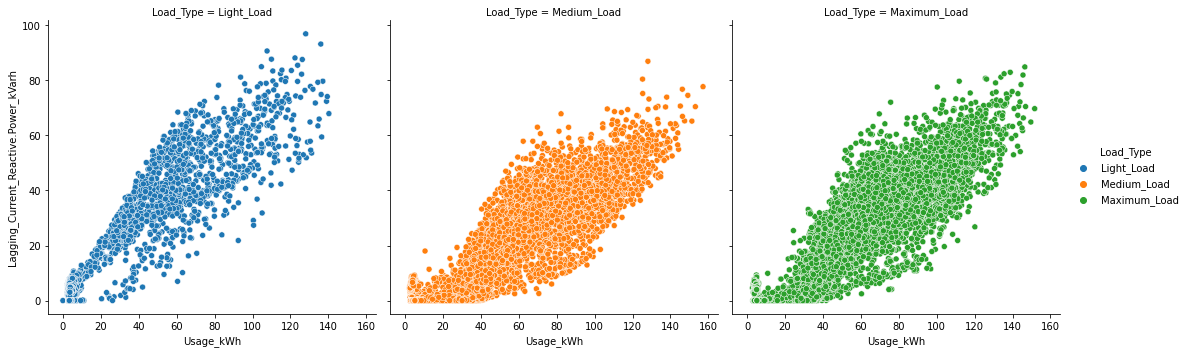

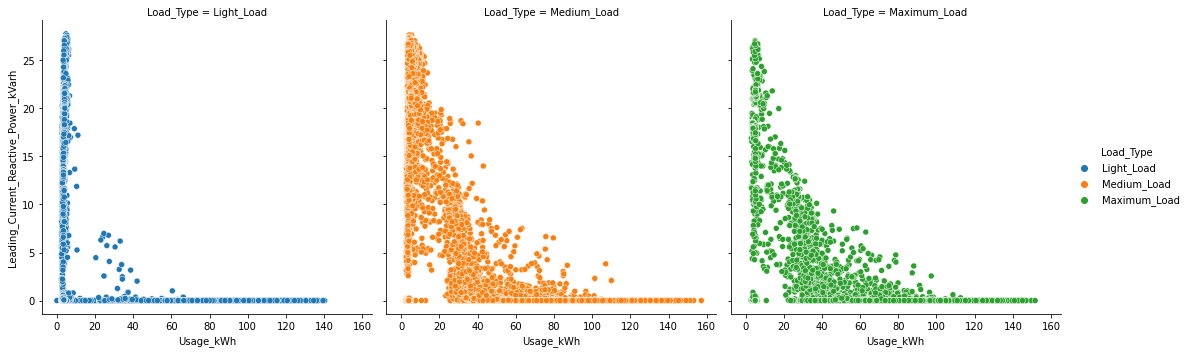

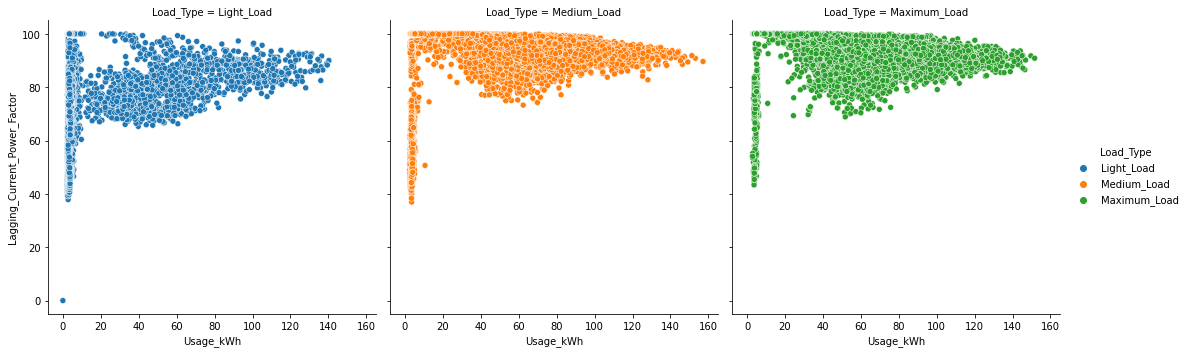

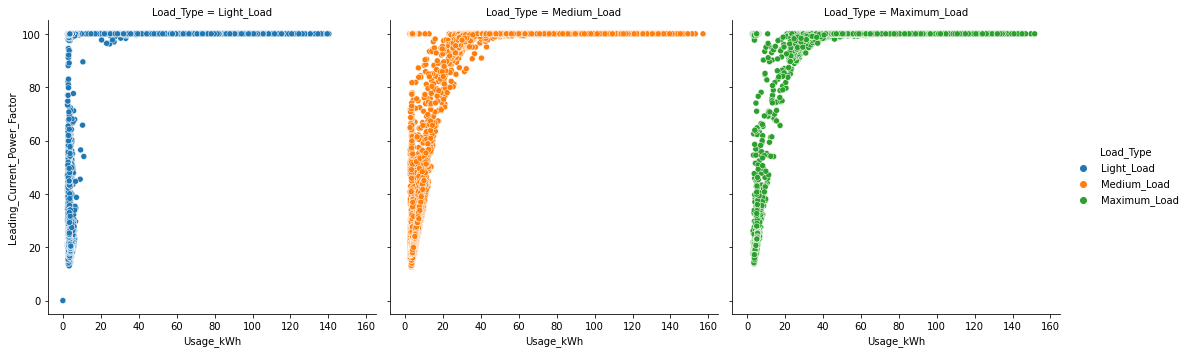

In [ ]:
import seaborn as sns
sns.relplot(data=df1, x="Usage_kWh", y="Lagging_Current_Reactive.Power_kVarh", hue="Load_Type", col="Load_Type", palette='tab10')
sns.relplot(data=df1, x="Usage_kWh", y="Leading_Current_Reactive_Power_kVarh", hue="Load_Type", col="Load_Type", palette='tab10')
sns.relplot(data=df1, x="Usage_kWh", y="Lagging_Current_Power_Factor", hue="Load_Type", col="Load_Type", palette='tab10')
sns.relplot(data=df1, x="Usage_kWh", y="Leading_Current_Power_Factor", hue="Load_Type", col="Load_Type", palette='tab10')

In [ ]:
df1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [ ]:
for i in cat_cols:
  print(df1[i].unique())

['Weekday' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
['Light_Load' 'Medium_Load' 'Maximum_Load']


In [ ]:
df1['WeekStatus'] = df1['WeekStatus'].map({'Weekday': 0, 'Weekend': 1})

In [ ]:
# use the map function to encode the load types
df1['Load_Type'] = df1['Load_Type'].map({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Day_of_week'] = le.fit_transform(df1['Day_of_week'])

In [ ]:
#indexing date
df1= df1.set_index('date')

In [ ]:
import scipy.stats as stats
skewness = df1.apply(lambda x: stats.skew(x))
print(skewness)

Usage_kWh                               1.197343
Lagging_Current_Reactive.Power_kVarh    1.437838
Leading_Current_Reactive_Power_kVarh    1.734239
CO2(tCO2)                               1.149305
Lagging_Current_Power_Factor           -0.606100
Leading_Current_Power_Factor           -1.511920
NSM                                     0.000000
WeekStatus                              0.952934
Day_of_week                             0.005479
Load_Type                               0.606439
dtype: float64


# XG boost classifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X = df1.drop('Load_Type', axis = 1)
y = df1['Load_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [ ]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

In [ ]:
# Train the classifier
xgb_clf.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred = xgb_clf.predict(X_test)


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[3520,   80,   15],
       [  71, 1589,  279],
       [  12,  187, 1255]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9081050228310502

<AxesSubplot:>

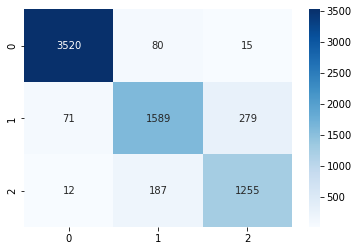

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [ ]:
print( metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3615
           1       0.86      0.82      0.84      1939
           2       0.81      0.86      0.84      1454

    accuracy                           0.91      7008
   macro avg       0.88      0.89      0.88      7008
weighted avg       0.91      0.91      0.91      7008



**This is a classification report for a model that was trained and evaluated on a dataset with three classes (0, 1, and 2). Here's what each metric means:**

Precision: the proportion of true positive predictions among all positive predictions. In other words, it measures how often the model is correct when it predicts a positive (1 or 2). The precision for class 0 is 0.98, which means that when the model predicts class 0, it is correct 98% of the time. The precision for class 1 is 0.86, which means that when the model predicts class 1, it is correct 86% of the time. The precision for class 2 is 0.81, which means that when the model predicts class 2, it is correct 81% of the time.

Recall: the proportion of true positive predictions among all actual positive instances. In other words, it measures how often the model correctly identifies positive instances. The recall for class 0 is 0.97, which means that the model correctly identifies 97% of the instances of class 0. The recall for class 1 is 0.82, which means that the model correctly identifies 82% of the instances of class 1. The recall for class 2 is 0.86, which means that the model correctly identifies 86% of the instances of class 2.

F1-score: the harmonic mean of precision and recall. It combines both metrics to give an overall measure of the model's performance for a particular class. The F1-score for class 0 is 0.98, which means that the model performs very well for this class. The F1-score for class 1 is 0.84, which means that the model is less accurate for this class. The F1-score for class 2 is also 0.84, which means that the model is also less accurate for this class.

Support: the number of actual instances of each class in the dataset.

Accuracy: the proportion of correct predictions among all predictions. The accuracy of the model is 0.91, which means that it correctly predicts the class of 91% of the instances in the dataset.

In general, the model performs well for class 0, but less well for classes 1 and 2. The weighted average of the F1-score and precision is 0.91, which indicates that the overall performance of the model is good. However, it's worth noting that the distribution of classes in the dataset could affect the overall performance of the model, and it might be useful to look at other evaluation metrics or to try other models.

# Hyper parameter tunning

In [ ]:
param={'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
       'max_depth':[3,4,5,6,7,8,10,12,15],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.3,0.4],
       'n_estimators':[10,20]}
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsc=RandomizedSearchCV(estimator=xgb_clf, param_distributions=param ,scoring='accuracy',cv=10,n_jobs=-1,n_iter=3)

In [ ]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           min_child_weight=None, missing=nan,
                

In [ ]:
rsc.best_params_

{'n_estimators': 20,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.4}

In [ ]:
rsc.best_score_

0.9048236477831221

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predKNN=knn.predict(X_test)

In [ ]:

print('accuracy score is:-',metrics.accuracy_score(y_test,y_predKNN))
print('''
''')
print('        ****METRIX CLASSIFICATION REPORT****   ')
print( metrics.classification_report(y_test,y_predKNN))

accuracy score is:- 0.8779965753424658


        ****METRIX CLASSIFICATION REPORT****   
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3615
           1       0.80      0.79      0.79      1939
           2       0.79      0.80      0.79      1454

    accuracy                           0.88      7008
   macro avg       0.85      0.85      0.85      7008
weighted avg       0.88      0.88      0.88      7008



**The accuracy score of the model is 0.878, which means that it correctly predicts the class of 87.8% of the instances in the dataset.**

Here's what each metric means:

Precision: the proportion of true positive predictions among all positive predictions. In other words, it measures how often the model is correct when it predicts a positive (1 or 2). The precision for class 0 is 0.96, which means that when the model predicts class 0, it is correct 96% of the time. The precision for class 1 is 0.80, which means that when the model predicts class 1, it is correct 80% of the time. The precision for class 2 is 0.79, which means that when the model predicts class 2, it is correct 79% of the time.

Recall: the proportion of true positive predictions among all actual positive instances. In other words, it measures how often the model correctly identifies positive instances. The recall for class 0 is 0.96, which means that the model correctly identifies 96% of the instances of class 0. The recall for class 1 is 0.79, which means that the model correctly identifies 79% of the instances of class 1. The recall for class 2 is 0.80, which means that the model correctly identifies 80% of the instances of class 2.

F1-score: the harmonic mean of precision and recall. It combines both metrics to give an overall measure of the model's performance for a particular class. The F1-score for class 0 is 0.96, which means that the model performs very well for this class. The F1-score for class 1 is 0.79, which means that the model is less accurate for this class. The F1-score for class 2 is also 0.79, which means that the model is also less accurate for this class.

Support: the number of actual instances of each class in the dataset.

Macro average: the arithmetic mean of precision, recall, and F1-score for all classes. It provides a measure of the model's performance that is not influenced by the class imbalance.

Weighted average: the weighted average of precision, recall, and F1-score for all classes. It takes into account the number of instances of each class in the dataset.

In general, the model performs well for class 0, but less well for classes 1 and 2. The weighted average of the F1-score and precision is 0.88, which indicates that the overall performance of the model is good. However, it's worth noting that the distribution of classes in the dataset could affect the overall performance of the model, and it might be useful to look at other evaluation metrics or to try other models.

# Gauussian NB 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predNB=gnb.predict(X_test)
y_predNB

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
print('accuracy score is:-',metrics.accuracy_score(y_test,y_predNB))
print('''
''')
print('        ****METRIX CLASSIFICATION REPORT****   ')
print( metrics.classification_report(y_test,y_predNB))

accuracy score is:- 0.6863584474885844


        ****METRIX CLASSIFICATION REPORT****   
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      3615
           1       0.51      0.40      0.45      1939
           2       0.51      0.86      0.64      1454

    accuracy                           0.69      7008
   macro avg       0.65      0.68      0.64      7008
weighted avg       0.72      0.69      0.69      7008



**The accuracy score of the model is 0.686, which means that it correctly predicts the class of 68.6% of the instances in the dataset.**

Here's what each metric means:

Precision: the proportion of true positive predictions among all positive predictions. In other words, it measures how often the model is correct when it predicts a positive (1 or 2). The precision for class 0 is 0.92, which means that when the model predicts class 0, it is correct 92% of the time. The precision for class 1 is 0.51, which means that when the model predicts class 1, it is correct 51% of the time. The precision for class 2 is 0.51, which means that when the model predicts class 2, it is correct 51% of the time.

Recall: the proportion of true positive predictions among all actual positive instances. In other words, it measures how often the model correctly identifies positive instances. The recall for class 0 is 0.77, which means that the model correctly identifies 77% of the instances of class 0. The recall for class 1 is 0.40, which means that the model correctly identifies 40% of the instances of class 1. The recall for class 2 is 0.86, which means that the model correctly identifies 86% of the instances of class 2.

F1-score: the harmonic mean of precision and recall. It combines both metrics to give an overall measure of the model's performance for a particular class. The F1-score for class 0 is 0.84, which means that the model performs well for this class. The F1-score for class 1 is 0.45, which means that the model is less accurate for this class. The F1-score for class 2 is 0.64, which means that the model performs reasonably well for this class.

Support: the number of actual instances of each class in the dataset.

Macro average: the arithmetic mean of precision, recall, and F1-score for all classes. It provides a measure of the model's performance that is not influenced by the class imbalance.

Weighted average: the weighted average of precision, recall, and F1-score for all classes. It takes into account the number of instances of each class in the dataset.

**In general, the model performs well for class 0, but less well for classes 1 and 2. The weighted average of the F1-score and precision is 0.72, which indicates that the overall performance of the model is moderate. However, it's worth noting that the distribution of classes in the dataset could affect the overall performance of the model, and it might be useful to look at other evaluation metrics or to try other models.**